# ЛР №2

Контекст

2020 год уже позади, поэтому создается множество резюме этого года пандемии, например в виде рейтингов. Такой список (а точнее 3 списка) создал журнал «Ресторанный бизнес». На сайте вы можете найти только основную информацию о ранжированных ресторанах, полные данные и анализы доступны в платном отчете.

Содержание

Данные были получены с помощью веб-скрейпинга, то есть загрузки данных с использованием программного кода, основанного на коде веб-сайта. В данном случае для облегчения работы с сайтом использовался пакет «rvest» из языка программирования R вместе с надстройкой браузера «SelectorGadet».

Данные были загружены с сайта www.restaurantbusinessonline.com 30 января 2021 года с тремя заводами, описывающими 3 рейтинга: первые 250, первые 100 отступов и будущие 50, таким образом, были созданы 3 таблицы, в которых ресторан описывается несколькими переменными в каждой строке.

Вдохновение

Эти данные можно использовать, чтобы рассказать о том, каким был 2020 год для ресторанов, что было популярным, что может стать более популярным в ближайшее время или в чем разница между крупными компаниями и малым бизнесом. Мне любопытно, какую полезную информацию можно получить из этих данных!

Фото Луиса Ханселя на Unsplash.

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('Future50.csv')

In [3]:
data.head()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes


In [4]:
data['Sales'].value_counts()

44    5
39    5
24    4
20    3
22    3
28    3
48    2
21    2
25    2
27    2
29    2
49    2
37    2
38    2
42    2
47    2
31    1
30    1
40    1
41    1
23    1
45    1
32    1
Name: Sales, dtype: int64

In [5]:
# Кодируем признаки Sales и Location в отдельные столбцы
data = pd.get_dummies(data, columns=['Sales','Location'])

In [6]:
# Наличие франшизы кодируем в 1/0
data['Franchis']=data.Franchising.replace({'No':0,'Yes':1})
data.drop('Franchising', axis = 1, inplace = True)

In [7]:
data.head()

,Rank,Restaurant,YOY_Sales,Units,YOY_Units,Unit_Volume,Sales_20,Sales_21,Sales_22,Sales_23,...,"Location_San Francisco, Calif.","Location_San Ramon, Calif.","Location_Scottsdale, Ariz.","Location_Seattle, Wash.","Location_Spartanburg, S.C.","Location_Wall Township, N.J.","Location_Washington, D.C.","Location_Wilmington, N.C.","Location_Yorba Linda, Calif.",Franchis
0,1,Evergreens,130.5%,26,116.7%,1150,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,Clean Juice,121.9%,105,94.4%,560,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,Slapfish,81.0%,21,90.9%,1370,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,Clean Eatz,79.7%,46,58.6%,685,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,5,Pokeworks,77.1%,50,56.3%,1210,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Масштабирование значений

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, StandardScaler, Normalizer

In [9]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Units']])

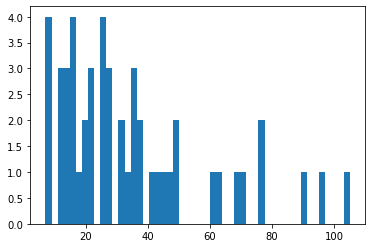

In [10]:
plt.hist(data['Units'], 50)
plt.show()

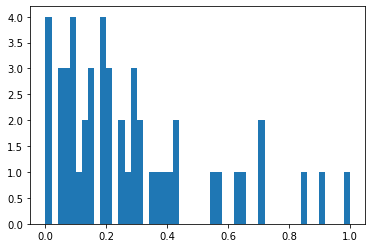

In [11]:
plt.hist(sc1_data, 50)
plt.show()

In [12]:
# Удаляем столбцы, которые не несут значимой информации
data.drop(['YOY_Sales','Restaurant','YOY_Units'], axis = 1, inplace = True)

In [13]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Units']])

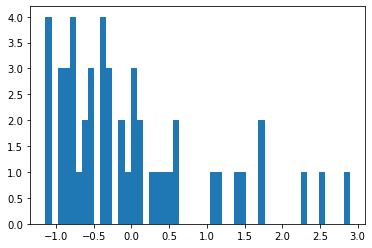

In [14]:
plt.hist(sc2_data, 50)
plt.show()

In [15]:
data.head()

,Rank,Units,Unit_Volume,Sales_20,Sales_21,Sales_22,Sales_23,Sales_24,Sales_25,Sales_27,...,"Location_San Francisco, Calif.","Location_San Ramon, Calif.","Location_Scottsdale, Ariz.","Location_Seattle, Wash.","Location_Spartanburg, S.C.","Location_Wall Township, N.J.","Location_Washington, D.C.","Location_Wilmington, N.C.","Location_Yorba Linda, Calif.",Franchis
0,1,26,1150,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,105,560,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,21,1370,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,46,685,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,5,50,1210,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
